# Bitcoin Price Prediction using LSTM

In this project, we aim to predict the future price of Bitcoin using Long Short-Term Memory (LSTM), a type of recurrent neural network (RNN), which is well-suited for time-series data.

## Project Overview:

- **Data Acquisition**: We collect historical Bitcoin price data from a reliable source such as Yahoo Finance using web scraping techniques.
- **Data Preprocessing**: We preprocess the raw data by cleaning, scaling, and structuring it into appropriate input-output pairs for training the LSTM model.
- **Model Building**: We construct an LSTM model using the TensorFlow Keras API, comprising input, LSTM, dropout, and dense layers to learn and predict Bitcoin prices based on historical data.
- **Model Training**: We train the LSTM model on the prepared data, optimizing it to minimize the mean squared error loss and preventing overfitting using dropout regularization and early stopping.
- **Evaluation**: We evaluate the trained model's performance on a separate test set to assess its ability to generalize to unseen data.
- **Visualization**: We visualize the predicted Bitcoin prices against the actual prices using Matplotlib, providing insights into the model's performance.
- **Prediction for Tomorrow**: Finally, we predict the Bitcoin price for tomorrow using the trained LSTM model, enabling us to forecast future price trends.

## Tools and Libraries:

- Python: Programming language for data preprocessing, model building, and visualization.
- TensorFlow: Deep learning framework for building and training LSTM models.
- BeautifulSoup: Python library for web scraping to collect Bitcoin price data.
- Pandas: Data manipulation library for handling tabular data efficiently.
- Matplotlib: Data visualization library for plotting the predicted vs actual Bitcoin prices.

By leveraging LSTM models and deep learning techniques, this project aims to provide valuable insights into Bitcoin price movements and facilitate informed decision-making for investors and traders in the cryptocurrency market.


# Importing Required Libraries

In this section, we import the necessary libraries for our Bitcoin price prediction model. These include:

- `requests` for making HTTP requests to fetch data from the web.
- `BeautifulSoup` from the `bs4` package for parsing HTML and extracting data.
- `time` for implementing delays in our web scraping process.


In [60]:
import requests
from bs4 import BeautifulSoup
import time

# Getting the Current Time

In this section, we get the current time in Unix timestamp format (seconds since January 1, 1970). This will be useful when getting data by web scraping.

In [61]:
now = str(int(time.time()))
now

'1717785467'

# Fetching Bitcoin Historical Data

In this section, we fetch the historical Bitcoin price data from Yahoo Finance. We construct the URL with the desired time period and make an HTTP GET request using the `requests` library. 


In [62]:
url = 'https://finance.yahoo.com/quote/BTC-USD/history/?period1=1585872000&period2=' + now
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    print('Request was successful')
else:
    print('Failed to fetch data. Status code:', response.status_code)

Request was successful


# Parsing the HTML Response

In this section, we use BeautifulSoup to parse the HTML response from Yahoo Finance. By extracting and printing the title of the page, we can confirm that we have successfully fetched and parsed the web page.

In [63]:
soup = BeautifulSoup(response.text,'html.parser')
soup.title.text

'Bitcoin USD (BTC-USD) Stock Historical Prices & Data - Yahoo Finance'

# Viewing the Parsed HTML Content

In [64]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html class="desktop neo-green dock-upscale" data-color-scheme="light" lang="en-US" theme="light">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="guce.yahoo.com" name="oath:guce:consent-host"/>
  <link href="../../../assets/_app/immutable/assets/2.B6ft43yh.css" rel="stylesheet"/>
  <link href="../../../assets/_app/immutable/assets/Ads.3RMLh2mX.css" rel="stylesheet"/>
  <link href="../../../assets/_app/imm


# Extracting Table Rows

In this section, we extract specific table rows containing Bitcoin price data from the parsed HTML. We use BeautifulSoup's `find_all` method to locate all table rows (`<tr>`) with the specified class attribute.

- `records` stores a list of all `<tr>` elements with the class `svelte-ewueuo`.
- We print the first five records to verify the extraction.

In [65]:
records = soup.find_all('tr', class_='svelte-ewueuo')
records[:5]

[<tr class="svelte-ewueuo"><th class="svelte-ewueuo">Date  </th><th class="svelte-ewueuo">Open  </th><th class="svelte-ewueuo">High  </th><th class="svelte-ewueuo">Low  </th><th class="svelte-ewueuo">Close   <span class="container svelte-7dju6j"><div class="icon fin-icon primary-icn sz-medium tw-align-text-top svelte-21xhfv"><!-- HTML_TAG_START --><svg viewbox="0 0 24 24" xmlns="http://www.w3.org/2000/svg"><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2m0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8"></path></svg><!-- HTML_TAG_END --></div> <div class="tooltip al-bottom svelte-7dju6j" role="tooltip"><div class="arrow svelte-7dju6j"></div> <h3 class="title svelte-7dju6j"></h3> <span class="toolTipContent svelte-ewueuo" slot="content">Close price adjusted for splits. </span></div> </span> </th><th class="svelte-ewueuo">Adj Close   <span class="container svelte-7dju6j"><div class="icon fin-icon primary-icn sz-medium tw-align-tex

# Analyzing the Extracted Data

In this section, we analyze the extracted data by checking the total number of records and estimating the number of years of data available. This helps us understand the scope and coverage of our dataset.


In [66]:
print('total records count: ', len(records))
print('data of %.2f years' % (len(records)/365))

total records count:  1528
data of 4.19 years


# Extracting Dates and Prices

In this section, we extract the dates and closing prices from the table rows. We iterate through the extracted records, parsing the necessary data from each row.

- `date` list stores the extracted dates.
- `price` list stores the extracted closing prices.
- We skip the first record if it contains headers.

For each record:
- We find all `<td>` elements in the row.
- We append the text from the first `<td>` element to the `date` list.
- We append the text from the fifth `<td>` element to the `price` list.


In [67]:
date = []
price = []

for rec in records[1:]:
    tds = rec.find_all('td')
    date.append(tds[0].text)
    price.append(tds[4].text)

# Importing Additional Libraries

In this section, we import additional libraries that are essential for data manipulation and analysis:

- `numpy` 
- `pandas` 


In [68]:
import numpy as np
import pandas as pd

# Creating a DataFrame

In this section, we create a Pandas DataFrame from the extracted date and price data. This DataFrame will allow us to perform various data manipulation and analysis tasks efficiently.


In [69]:
df = pd.DataFrame({'date':date, 'price':price})
df.head()

,date,price
0,"Jun 7, 2024","69,153.80"
1,"Jun 6, 2024","70,757.16"
2,"Jun 5, 2024","71,082.82"
3,"Jun 4, 2024","70,567.77"
4,"Jun 3, 2024","68,804.78"


# Data Cleaning and Preprocessing

In this section, we perform data cleaning and preprocessing on the DataFrame:

1. **Cleaning Price Data**: We remove commas from the 'price' column and convert the values to floating-point numbers using the `.str.replace()` and `.astype(float)` methods.

2. **Converting Date Data**: We convert the 'date' column to datetime format using the `pd.to_datetime()` function, specifying the format as '%b %d, %Y' to match the date format in the data.

3. **Setting Date as Index**: We set the 'date' column as the index of the DataFrame using the `.set_index()` method, ensuring easy access and manipulation of time-series data.

In [70]:
df['price'] = df['price'].str.replace(',', '').astype(float)

df['date'] = pd.to_datetime(df['date'], format='%b %d, %Y')
df.set_index('date', inplace=True)

df.head()

,price
date,
2024-06-07,69153.80
2024-06-06,70757.16
2024-06-05,71082.82
2024-06-04,70567.77
2024-06-03,68804.78


# Data Scaling

In this section, we scale the 'price' data using Min-Max scaling to normalize it within the range of 0 to 1. This scaling technique is commonly used to standardize numerical features for machine learning models.

In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['price'].values.reshape(-1, 1))

In [72]:
scaled_data

array([[0.94085464],
       [0.96498658],
       [0.96988805],
       ...,
       [0.00224288],
       [0.00339276],
       [0.00137384]])

# Time Series Data Preparation

In this section, we prepare the time series data for training a machine learning model. We create input-output pairs for a sliding window approach:

- We define a `time_step` variable indicating the number of time steps (or lag observations) to use for predicting the next value.
- We initialize empty lists `X` and `Y` to store input sequences and corresponding output values.
- We loop through the scaled data to create input-output pairs, where each input sequence (`X`) contains `time_step` consecutive values, and the corresponding output (`Y`) is the next value after the sequence.
- Finally, we convert the lists to numpy arrays and reshape `X` to match the input shape required by the model.


In [73]:
time_step = 10
X, Y = [], []

for i in range(len(scaled_data) - time_step - 1):
    X.append(scaled_data[i:(i + time_step), 0])
    Y.append(scaled_data[i + time_step, 0])
    
X, Y = np.array(X), np.array(Y)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [74]:
print('data of previous 10 days :\n',X[0])
print('\nlabel (btc price of today) :\n',Y[0])

data of previous 10 days :
 [[0.94085464]
 [0.96498658]
 [0.96988805]
 [0.9621361 ]
 [0.93560159]
 [0.91975032]
 [0.91907815]
 [0.91583424]
 [0.92898237]
 [0.91713885]]

label (btc price of today) :
 0.9279473231971818


# Splitting the Data into Train, Validation, and Test Sets

In this section, we split the prepared data into train, validation, and test sets:

1. **Train Set**: The first 70% of the data is allocated for training.
2. **Validation Set**: The next 10% of the data is allocated for validation to monitor the model's performance during training.
3. **Test Set**: The remaining 20% of the data is allocated for testing to evaluate the final model performance.

In [75]:
split_point1 = int(0.7 * len(X))
split_point2 = int(0.8 * len(X))

x_train = X[:split_point1]
y_train = Y[:split_point1]

x_val = X[split_point1:split_point2]
y_val = Y[split_point1:split_point2]

x_test = X[split_point2:]
y_test = Y[split_point2:]

print('train set len: ', len(x_train))
print('validation set len: ', len(x_val))
print('test set len: ', len(x_test))

train set len:  1061
validation set len:  151
test set len:  304


# Training the LSTM Model

In this section, we train the LSTM model using the prepared train and validation sets:

- We define the LSTM model architecture with input shape `(time_step, 1)` and layers comprising LSTM, Dropout, and Dense layers.
- The model is compiled with the Adam optimizer and mean squared error loss function.
- We set up early stopping to monitor the validation loss and restore the best weights when training stops if the validation loss does not decrease for 5 consecutive epochs (`patience=5`).
- The model is trained using the `fit` method with the training data (`x_train`, `y_train`) and validation data (`x_val`, `y_val`), with a batch size of 32 and for a maximum of 50 epochs.

The training history (`hist`) contains information about the training and validation loss over epochs.


In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Input(shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0696 - val_loss: 0.0051
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - val_loss: 0.0045
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - val_loss: 0.0043
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - val_loss: 0.0043
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - val_loss: 0.0048
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - val_loss: 0.0041
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - val_loss: 0.0041
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - val_loss: 0.0042
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - val_loss: 0.0043
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - val_loss: 0.0056
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - val_loss: 0.0041
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - val_l

# Visualizing Predicted vs Actual Prices

In this section, we visualize the predicted and actual prices using the trained LSTM model:

- We make predictions (`pred`) on the entire dataset (`X`) using the trained model.

The visualization allows us to visually compare the predicted prices with the actual prices, assessing the performance of the LSTM model.

In [77]:
pred = model.predict(X)
pred = scaler.inverse_transform(pred)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


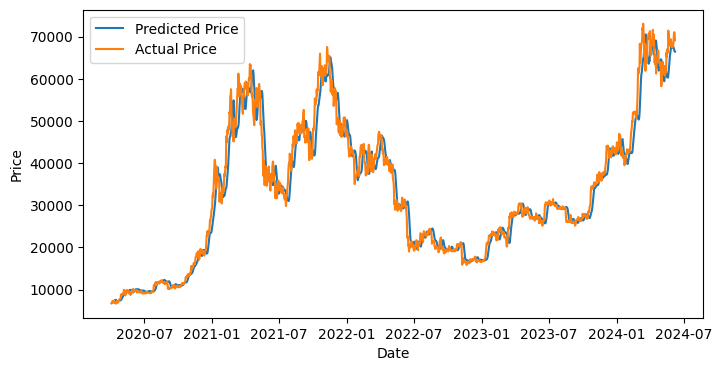

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(df.index[:len(pred)], pred, label='Predicted Price')
plt.plot(df.index, df['price'], label='Actual Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Evaluating Predictions on Test Set

In this section, we evaluate the predictions made by the LSTM model on the test set. The visualization allows us to assess how well the LSTM model performs in predicting Bitcoin prices on unseen data.

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8989e-04
Test Loss: 0.0002823187387548387


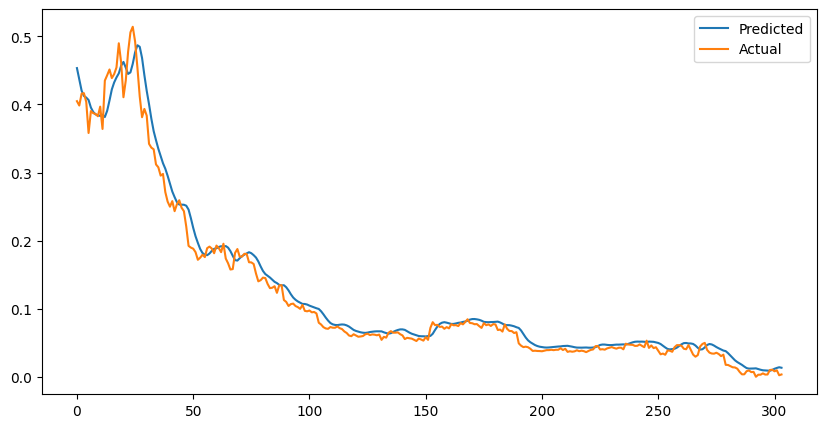

In [84]:
predictions = model.predict(x_test)
test_loss = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)

plt.figure(figsize=(10,5))
plt.plot(predictions, label='Predicted')
plt.plot(y_test, label='Actual')
plt.legend()
plt.show()

# Predicting Bitcoin Price for Tomorrow

In [85]:
tomorrow_pred = model.predict(X[[0]])
price = scaler.inverse_transform(tomorrow_pred)

print('predicted bitcoin price for tomorrow: %.3f' % float(price.squeeze()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
predicted bitcoin price for tomorrow: 66454.773
